In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder ,MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt

# formule de standardisation

et elle doit avoir une allure gaussienne
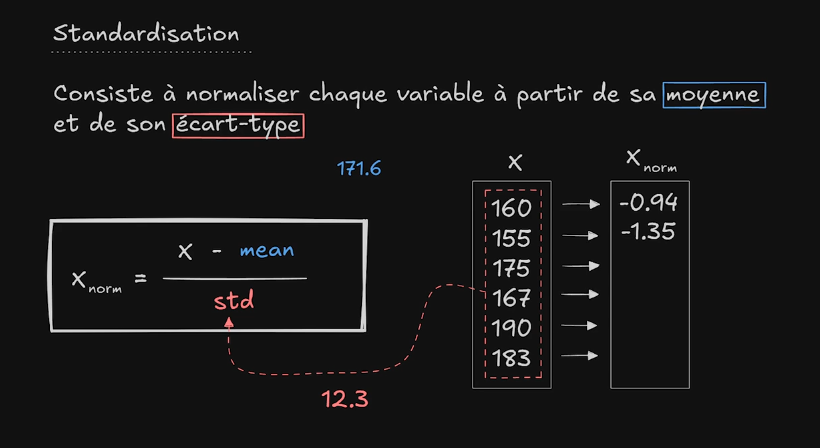

# MinMaxSCALER
c'est le choix par defaut par exple par vision par ordinateur ce sont des pixels

quand on a les valeurs aberantes il faut eviter ca il faut priviligier la standardisation elle ne laisse pas nos valeurs aberantes 



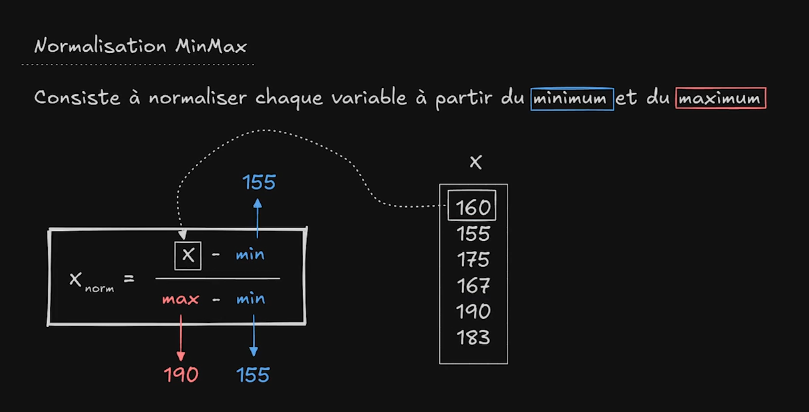



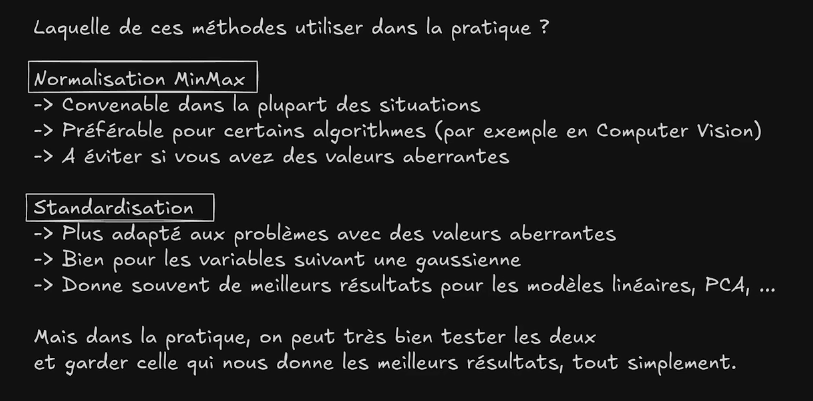

In [3]:
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df_number = df.select_dtypes(exclude='category')

df_number.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


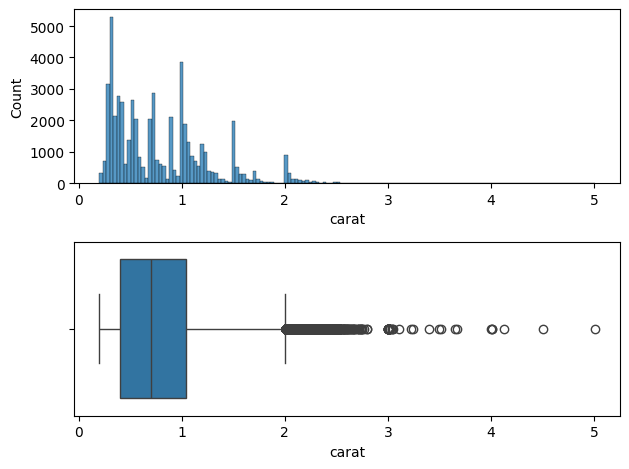

In [6]:
fig,ax = plt.subplots(2,1)

sns.histplot(data=df_number, x='carat', ax=ax[0])
sns.boxplot(data=df_number, x='carat', ax=ax[1])

plt.tight_layout()
plt.show()

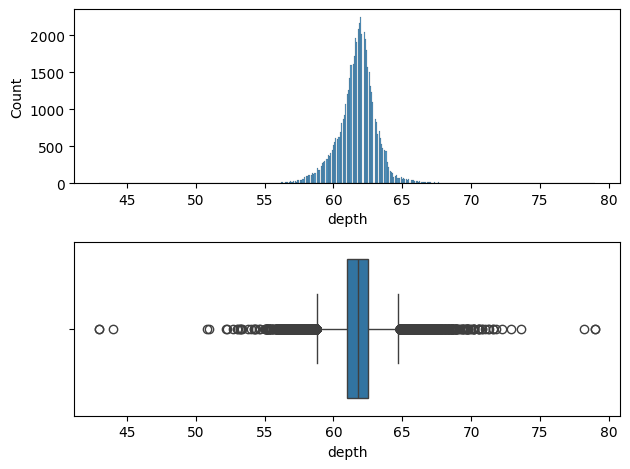

In [7]:
fig , a = plt.subplots(2,1)
sns.histplot(data=df_number, x='depth', ax=a[0])
sns.boxplot(data=df_number, x='depth', ax=a[1])         
plt.tight_layout()
plt.show()

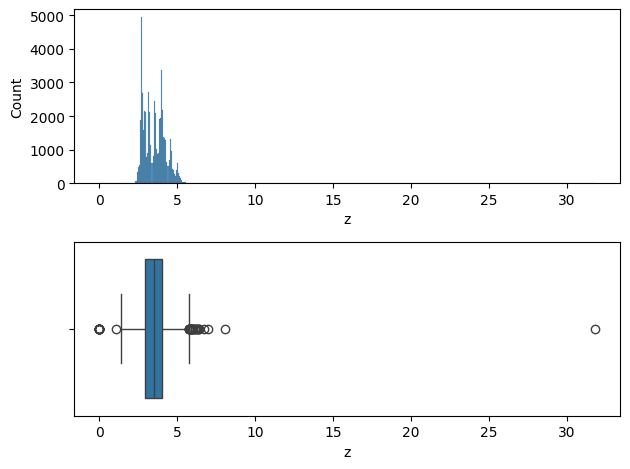

In [8]:
fig , a = plt.subplots(2,1)
sns.histplot(data=df_number, x='z', ax=a[0])
sns.boxplot(data=df_number, x='z', ax=a[1])         
plt.tight_layout()
plt.show()

In [10]:
scaler = MinMaxScaler()
scaler.fit(df_number)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [11]:
scaler.transform(df_number)

array([[0.00623701, 0.51388889, 0.23076923, ..., 0.36778399, 0.06757216,
        0.07641509],
       [0.002079  , 0.46666667, 0.34615385, ..., 0.36219739, 0.06519525,
        0.07264151],
       [0.00623701, 0.38611111, 0.42307692, ..., 0.37709497, 0.06910017,
        0.07264151],
       ...,
       [0.1039501 , 0.55      , 0.32692308, ..., 0.52700186, 0.09643463,
        0.11194969],
       [0.13721414, 0.5       , 0.28846154, ..., 0.5726257 , 0.10390492,
        0.11761006],
       [0.11434511, 0.53333333, 0.23076923, ..., 0.54283054, 0.09966044,
        0.11446541]], shape=(53940, 7))

In [13]:
df_minmax=pd.DataFrame(scaler.transform(df_number), columns=df_number.columns)

In [15]:
df_minmax.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.124312,0.520817,0.278023,0.194994,0.533627,0.097360,0.111281
std,0.098547,0.039795,0.042971,0.215680,0.104447,0.019391,0.022192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.500000,0.250000,0.033735,0.438547,0.080136,0.091509
50%,0.103950,0.522222,0.269231,0.112180,0.530726,0.096944,0.111006
75%,0.174636,0.541667,0.307692,0.270219,0.608939,0.111036,0.127044
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/tmp/ipykernel_40011/3482151300.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


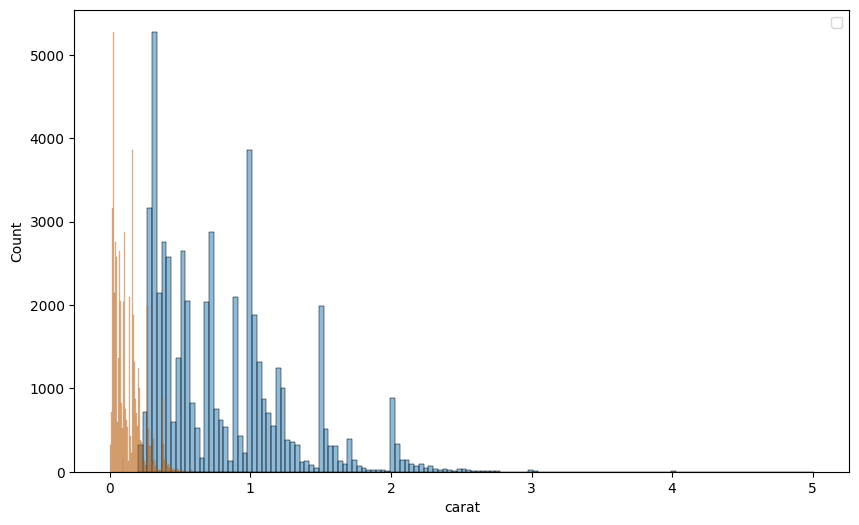

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_number, x='carat',color="tab:blue",alpha=0.5)
sns.histplot(data=df_minmax, x='carat',color='tab:orange',alpha=0.5)
plt.legend()
plt.show()

In [18]:
scaler = StandardScaler()

scaler.fit(df_number)
scaler.transform(df_number)



array([[-1.19816781, -0.17409151, -1.09967199, ..., -1.58783745,
        -1.53619556, -1.57112919],
       [-1.24036129, -1.36073849,  1.58552871, ..., -1.64132529,
        -1.65877419, -1.74117497],
       [-1.19816781, -3.38501862,  3.37566251, ..., -1.49869105,
        -1.45739502, -1.74117497],
       ...,
       [-0.20662095,  0.73334442,  1.13799526, ..., -0.06343409,
        -0.04774083,  0.03013526],
       [ 0.13092691, -0.52310533,  0.24292836, ...,  0.37338325,
         0.33750627,  0.28520393],
       [-0.10113725,  0.31452784, -1.09967199, ...,  0.08811478,
         0.11861587,  0.14349912]], shape=(53940, 7))

In [20]:
df_standart=pd.DataFrame(scaler.transform(df_number), columns=df_number.columns)

In [21]:
df_standart.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,0.000000,5.916184e-15,1.011674e-16,-6.744492e-17,2.023348e-16,-6.744492e-17,4.046695e-16
std,1.000009,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261458,-1.308760e+01,-6.470073e+00,-9.040952e-01,-5.109120e+00,-5.020931e+00,-5.014556e+00
25%,-0.839523,-5.231053e-01,-6.521385e-01,-7.476808e-01,-9.103248e-01,-8.882800e-01,-8.909461e-01
50%,-0.206621,3.531678e-02,-2.046051e-01,-3.839672e-01,-2.777553e-02,-2.147398e-02,-1.237618e-02
75%,0.510668,5.239361e-01,6.904618e-01,3.487866e-01,7.210542e-01,7.052421e-01,7.103184e-01
max,8.886075,1.204139e+01,1.680167e+01,3.732438e+00,4.465203e+00,4.654965e+01,4.004758e+01


/tmp/ipykernel_40011/2152229780.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


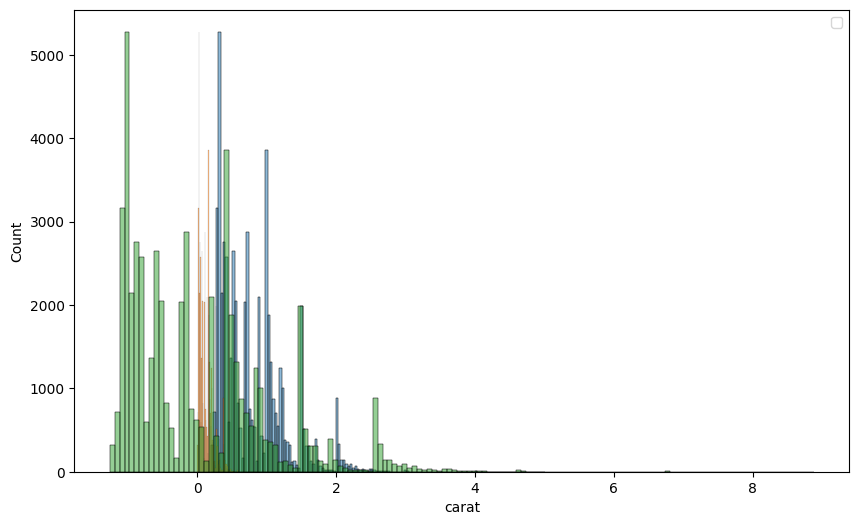

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_number, x='carat',color="tab:blue",alpha=0.5)
sns.histplot(data=df_minmax, x='carat',color='tab:orange',alpha=0.5)
sns.histplot(data=df_standart, x='carat',color='tab:green',alpha=0.5)   
plt.legend()
plt.show()

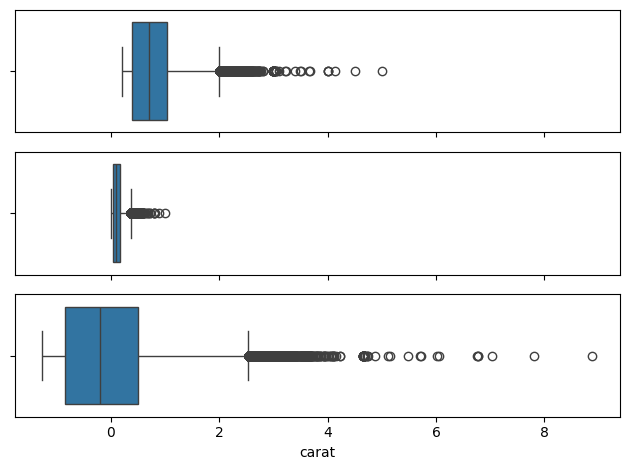

In [23]:
fig ,ax = plt.subplots(3,1,sharex=True)

sns.boxplot(data=df_number, x='carat', ax=ax[0])
sns.boxplot(data=df_minmax, x='carat', ax=ax[1])
sns.boxplot(data=df_standart, x='carat', ax=ax[2])      
plt.tight_layout()
plt.show()  
